In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

# Dataset

In [6]:
data = fetch_california_housing()
X, y = data.data, data.target
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Data pre-processing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
df = pd.DataFrame(data=X_train)
df.columns = data.feature_names 
df['MedHouseVal'] = y_train
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


What range are most of the median house prices valued at?

> Considering the 25th to the 75th percentile range, most of the median house prices fall within $119,300 and $265,000.

How are the median house prices distributed?

Text(0, 0.5, 'Frequency')

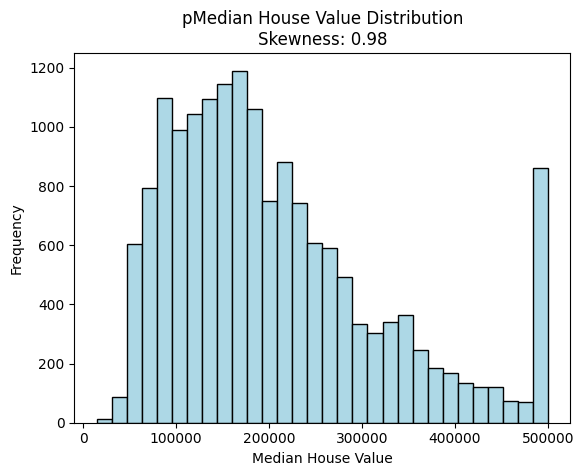

In [23]:
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'pMedian House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# Modeling

In [24]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)

y_pred_test = random_forest_regressor.predict(X_test)

# Evaluation

Estimate out-of-sample MAE, MSE, RMSE, and R²

In [28]:
# Mean Absolute Error: Think of drawing vertical lines from each blue point (true) to the red line (predicted). MAE is the average length of those lines.
mae = mean_absolute_error(y_test, y_pred_test)
# Mean Squared Error: Large vertical errors (far-away blue points) explode in importance.
mse = mean_squared_error(y_test, y_pred_test)
# Root Mean Squared Error: Same as MSE, but easier to interpret because it’s “in the same scale as the data”.
rmse = np.sqrt(mse)
# R-squared:  R² improves when the red “Predicted” line is closer to the cloud of blue “True” points. 1.0 → model perfectly explains the data.
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.3276
Mean Squared Error (MSE): 0.2557
Root Mean Squared Error (RMSE): 0.5057
R² Score: 0.8049


What do these statistics mean to you?

- MAE = 0.3276: On average, predicted median house prices are off by $32,760
- MSE = 0.2557: This is in squared units (hundreds of thousands of dollars)², making it hard to interpret directly
- RMSE = 0.5057: On average, predicted median house prices are off by $50,570 (penalizes larger errors more heavily than MAE)
- R² = 0.8049: The model explains about 80.5% of the variance in house prices, which is quite good


Plot Actual vs Predicted values

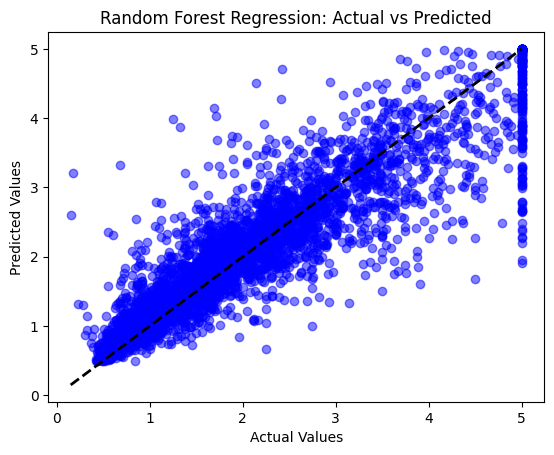

In [31]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

Plot the histogram of the residual errors (dollars)

Average error = -1216
Standard deviation of error = 50554


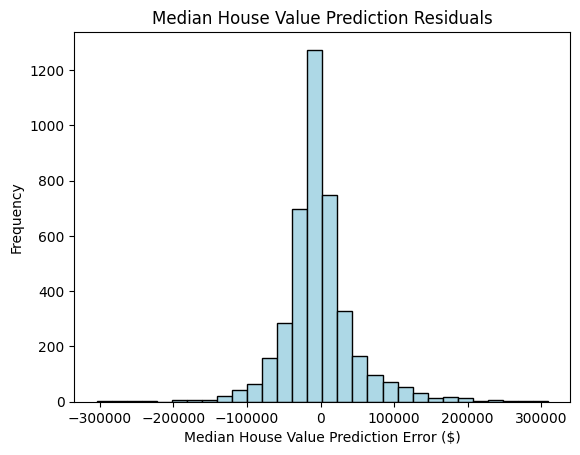

In [34]:
residuals = 1e5*(y_test - y_pred_test)
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

Plot the model residual errors by median house value

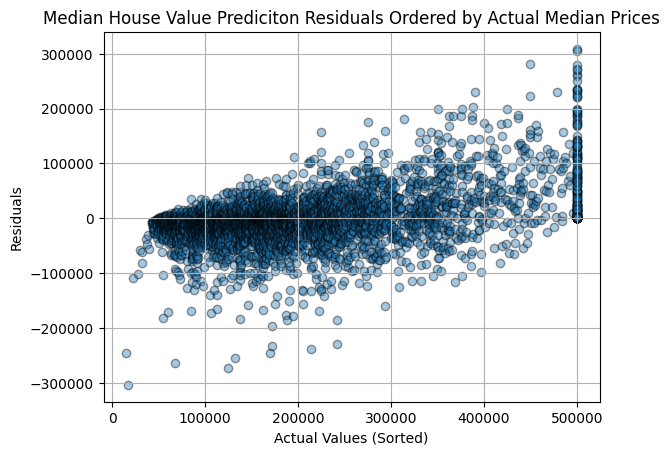

In [39]:
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

What trend can you infer from this residual plot?

Although we saw a small average residual of only -$1400, you can see from this plot that the average error as a function of median house price is actually increasing from negative to positive values. In other words, lower median prices tend to be overpredicted while higher median prices tend to be underpredicted.